Original ERP Image:


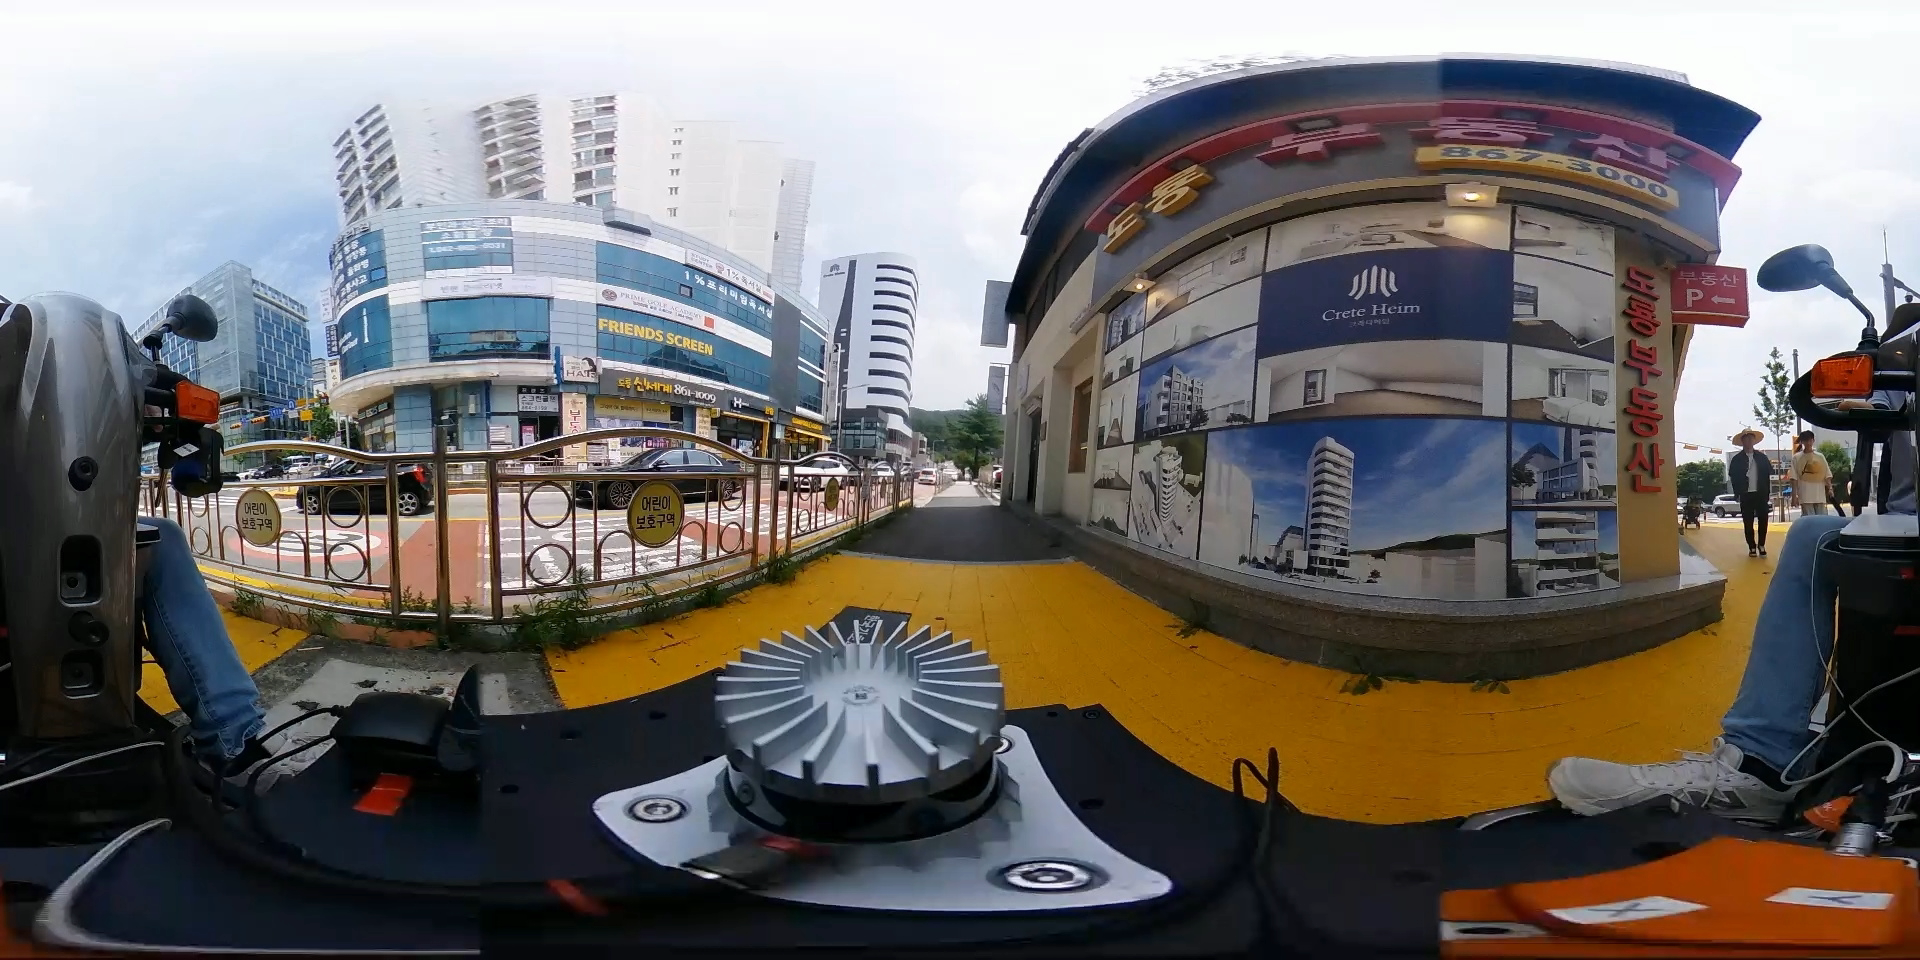

Front View:


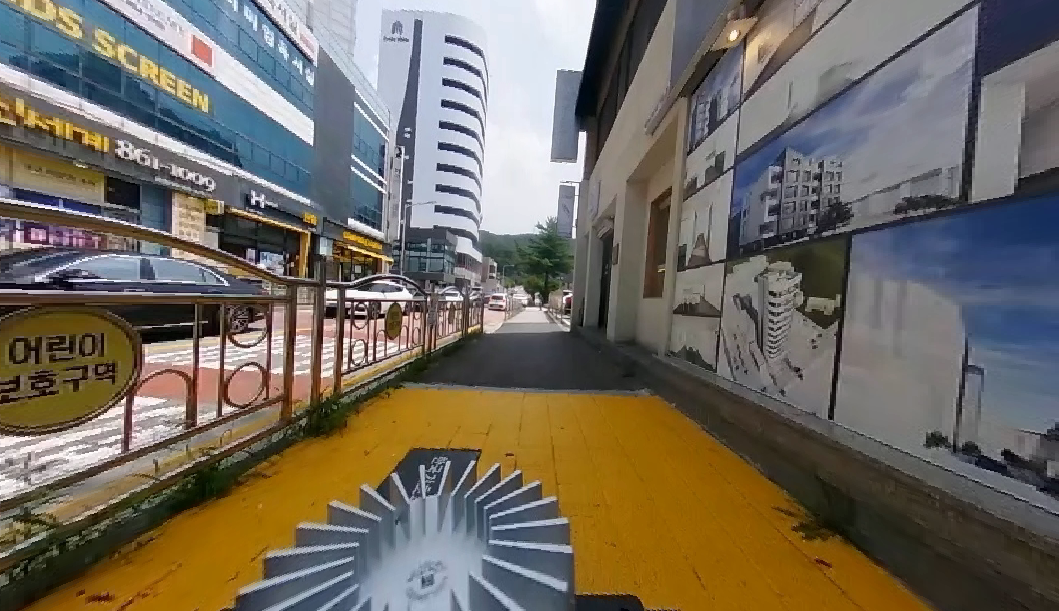

In [58]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def deg2rad(degrees):
    return degrees * np.pi / 180

def erp2rect(src, theta=deg2rad(180), hfov=deg2rad(120), vfov=deg2rad(90)):
    f = src.shape[1] / (2 * np.pi)
    dst_rows = int(2 * f * np.tan(vfov / 2) + 0.5)
    dst_cols = int(2 * f * np.tan(hfov / 2) + 0.5)
    dst = np.zeros((dst_rows, dst_cols, 3), dtype=src.dtype)

    dst_cx = dst_cols / 2
    dst_cy = dst_rows / 2

    for x in range(dst_cols):
        xth = np.arctan((x - dst_cx) / f)
        src_x = (int((xth + theta) * src.shape[1] / (2 * np.pi)) + src.shape[1]) % src.shape[1]
        yf = f / np.cos(xth)

        for y in range(dst_rows):
            yth = np.arctan((y - dst_cy) / yf)
            src_y = int(yth * src.shape[0] / np.pi + src.shape[0] / 2 + 0.5) % src.shape[0]
            dst[y, x] = src[src_y, src_x]

    return dst


# 이미지 읽기
src_img = cv2.imread('/content/erp.png')

# 이미지가 제대로 읽혔는지 확인
if src_img is None:
    print("이미지를 불러오는데 실패했습니다. 경로를 확인해주세요.")
else:
    # 정면 뷰 변환
    rect_img = erp2rect(src_img)

    # 원본 이미지 화면에 표시
    print("Original ERP Image:")
    cv2_imshow(src_img)

    # 정면 뷰 이미지 화면에 표시
    print("Front View:")
    cv2_imshow(rect_img)



In [51]:
def erp_to_topview(src, hfov, vfov):
    h, w, _ = src.shape
    cx, cy = w / 2, h / 2
    f = w / (2 * np.pi)

    # 출력 이미지의 크기를 시야각에 비례하게 설정
    output_size = (int(f * np.tan(hfov / 2) * 2), int(f * np.tan(vfov / 2) * 2))

    dst = np.zeros((output_size[1], output_size[0], 3), dtype=src.dtype)
    cx_dst, cy_dst = output_size[0] / 2, output_size[1] / 2

    for y_dst in range(output_size[1]):
        for x_dst in range(output_size[0]):
            x = (x_dst - cx_dst) / f * hfov / (2 * np.pi)
            y = (y_dst - cy_dst) / f * vfov / np.pi

            r = np.sqrt(x**2 + y**2)
            c = np.arctan(r)

            sin_c = np.sin(c)
            cos_c = np.cos(c)

            if c != 0:
                x = x * sin_c / r
                y = y * sin_c / r
            else:
                x = x
                y = y

            lon = np.arctan2(y, x)
            lat = np.pi / 2 - c

            src_x = lon * f + cx
            src_y = lat * f + cy

            if 0 <= src_x < w and 0 <= src_y < h:
                dst[y_dst, x_dst] = src[int(src_y), int(src_x)]

    return dst

수평 시야각을 입력하세요 (도 단위): 90
수직 시야각을 입력하세요 (도 단위): 90
Top View:


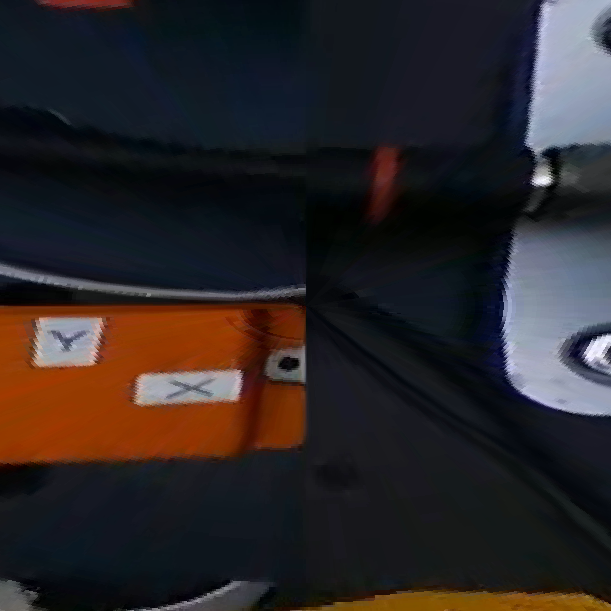

In [52]:
    # 시야각 입력받기
    hfov = float(input("수평 시야각을 입력하세요 (도 단위): "))
    vfov = float(input("수직 시야각을 입력하세요 (도 단위): "))

    topview_img = erp_to_topview(src_img, np.deg2rad(hfov), np.deg2rad(vfov))

    # 상단 뷰 이미지 화면에 표시
    print("Top View:")
    cv2_imshow(topview_img)

수평 시야각을 입력하세요 (도 단위): 150
수직 시야각을 입력하세요 (도 단위): 150
Top View:


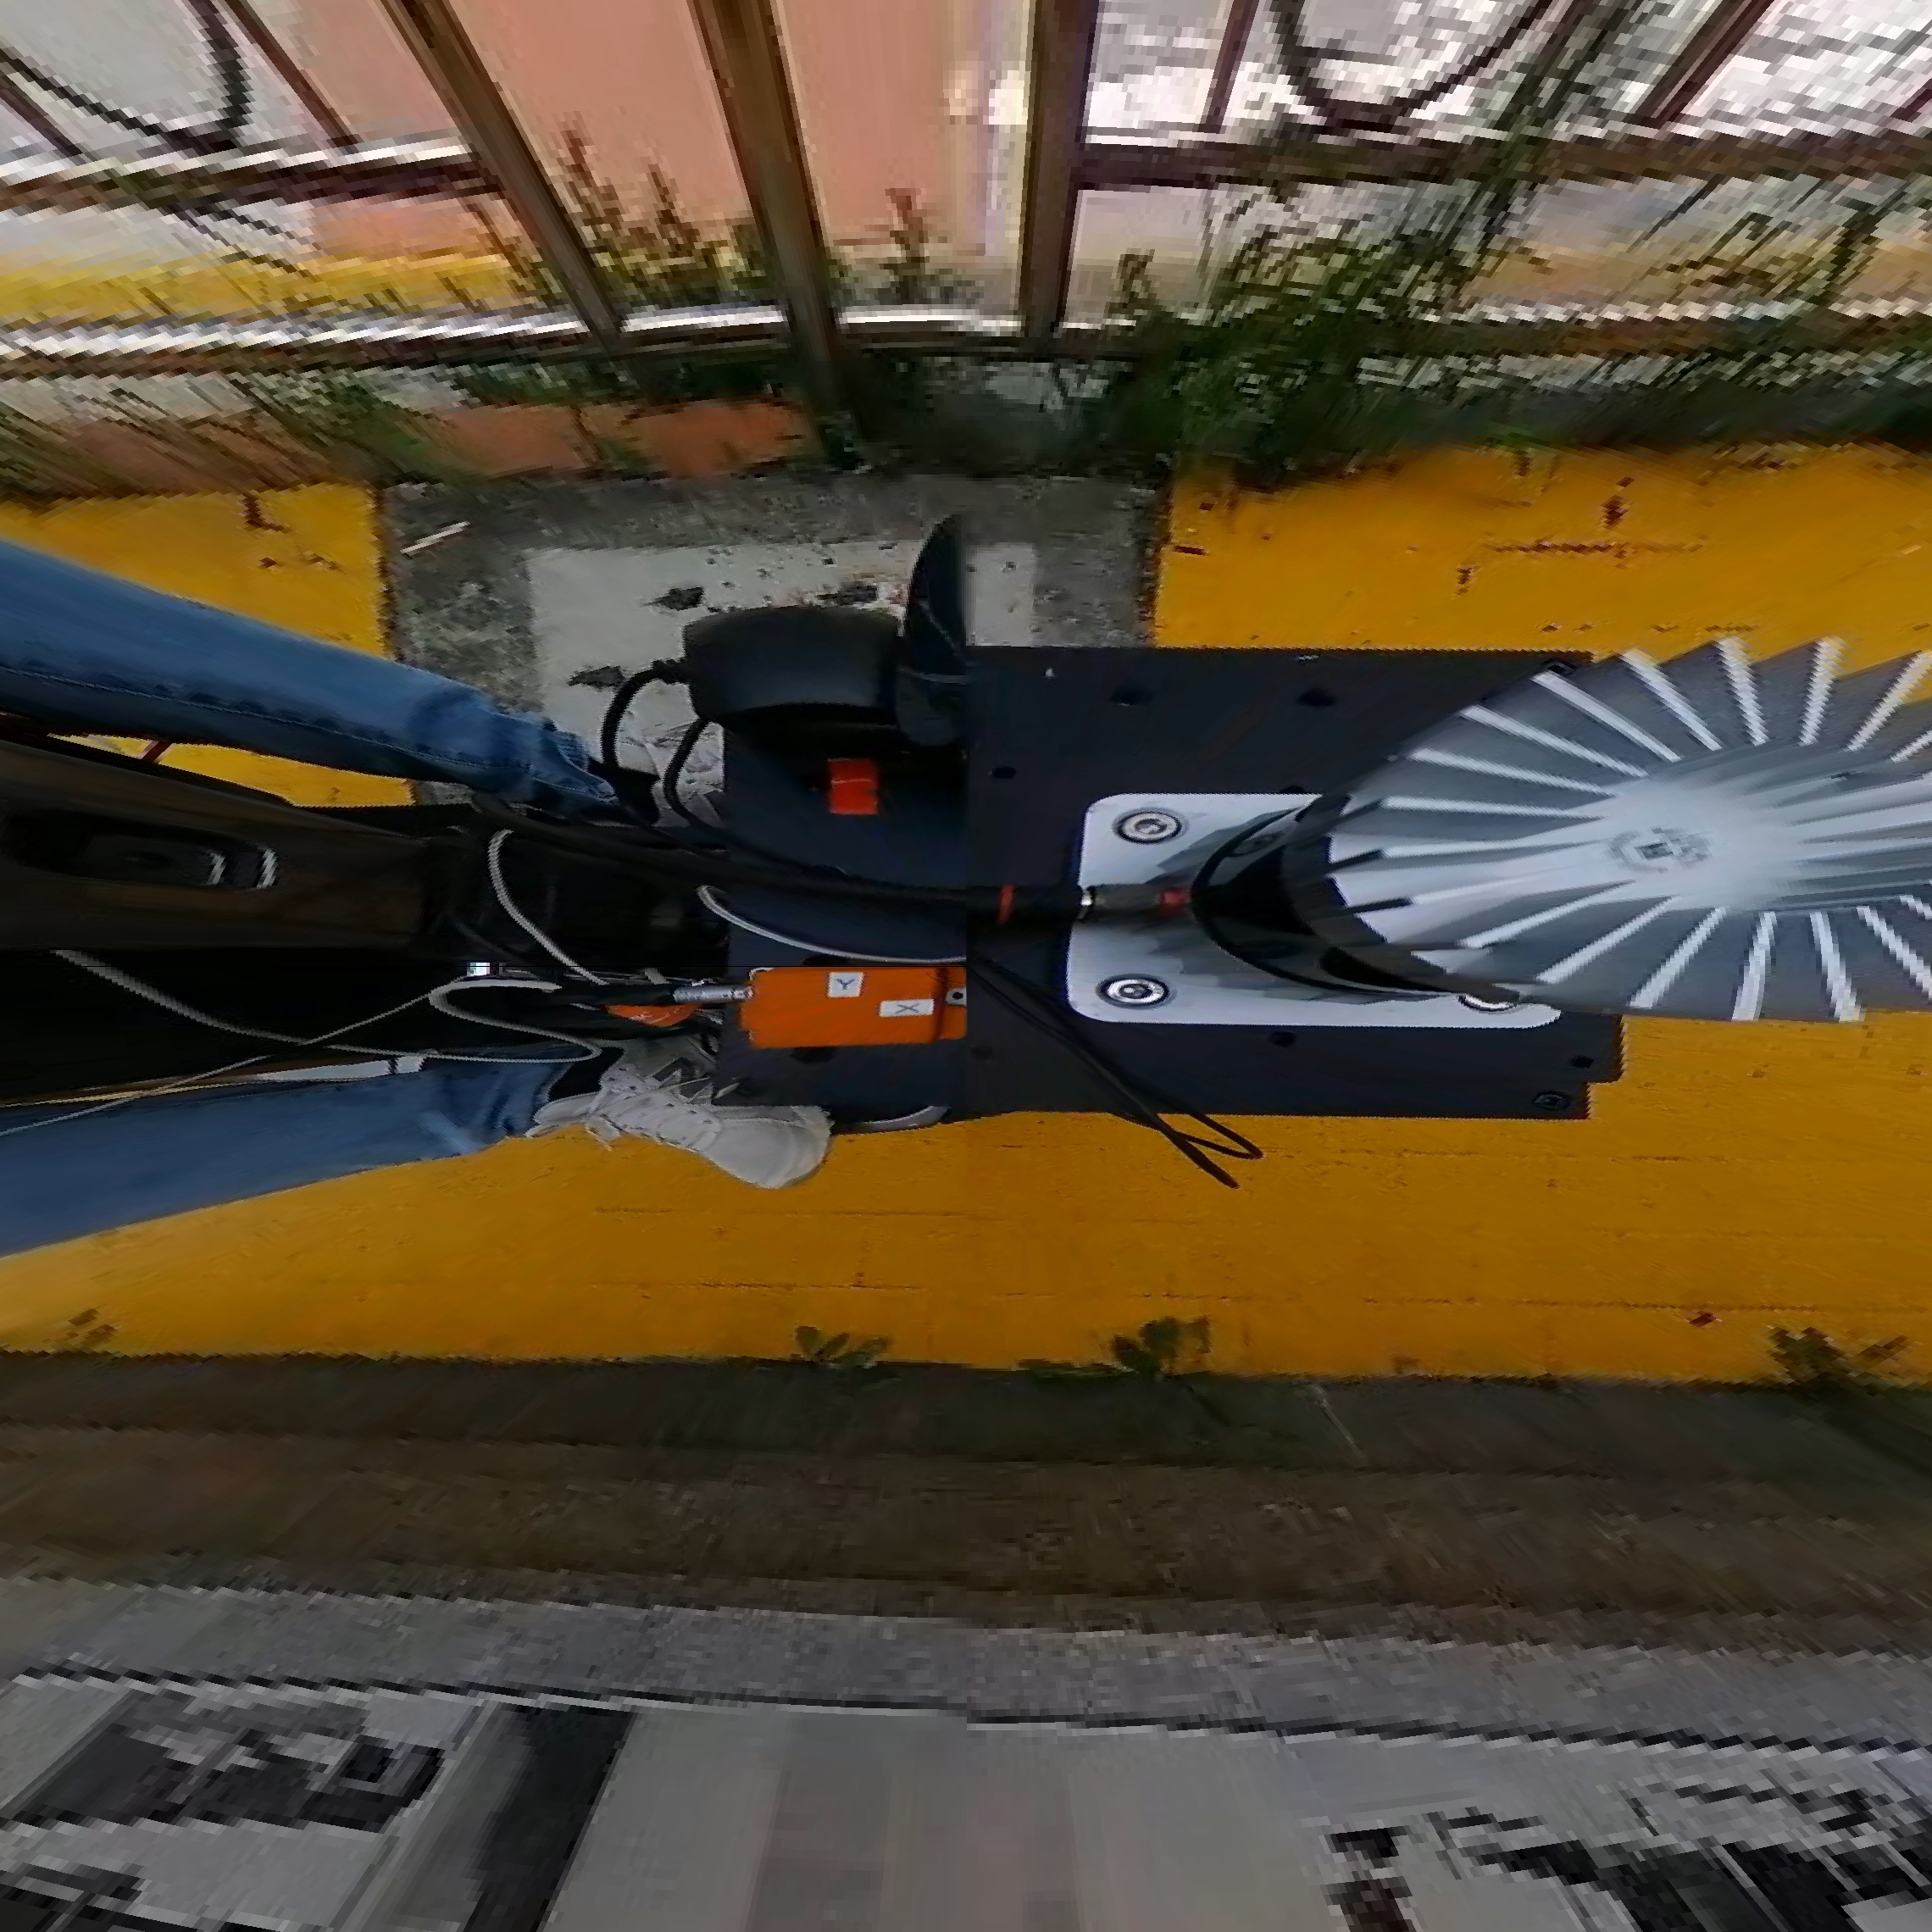

In [53]:
    # 시야각 입력받기
    hfov = float(input("수평 시야각을 입력하세요 (도 단위): "))
    vfov = float(input("수직 시야각을 입력하세요 (도 단위): "))

    topview_img = erp_to_topview(src_img, np.deg2rad(hfov), np.deg2rad(vfov))

    # 상단 뷰 이미지 화면에 표시
    print("Top View:")
    cv2_imshow(topview_img)

수평 시야각을 입력하세요 (도 단위): 120
수직 시야각을 입력하세요 (도 단위): 120
Top View:


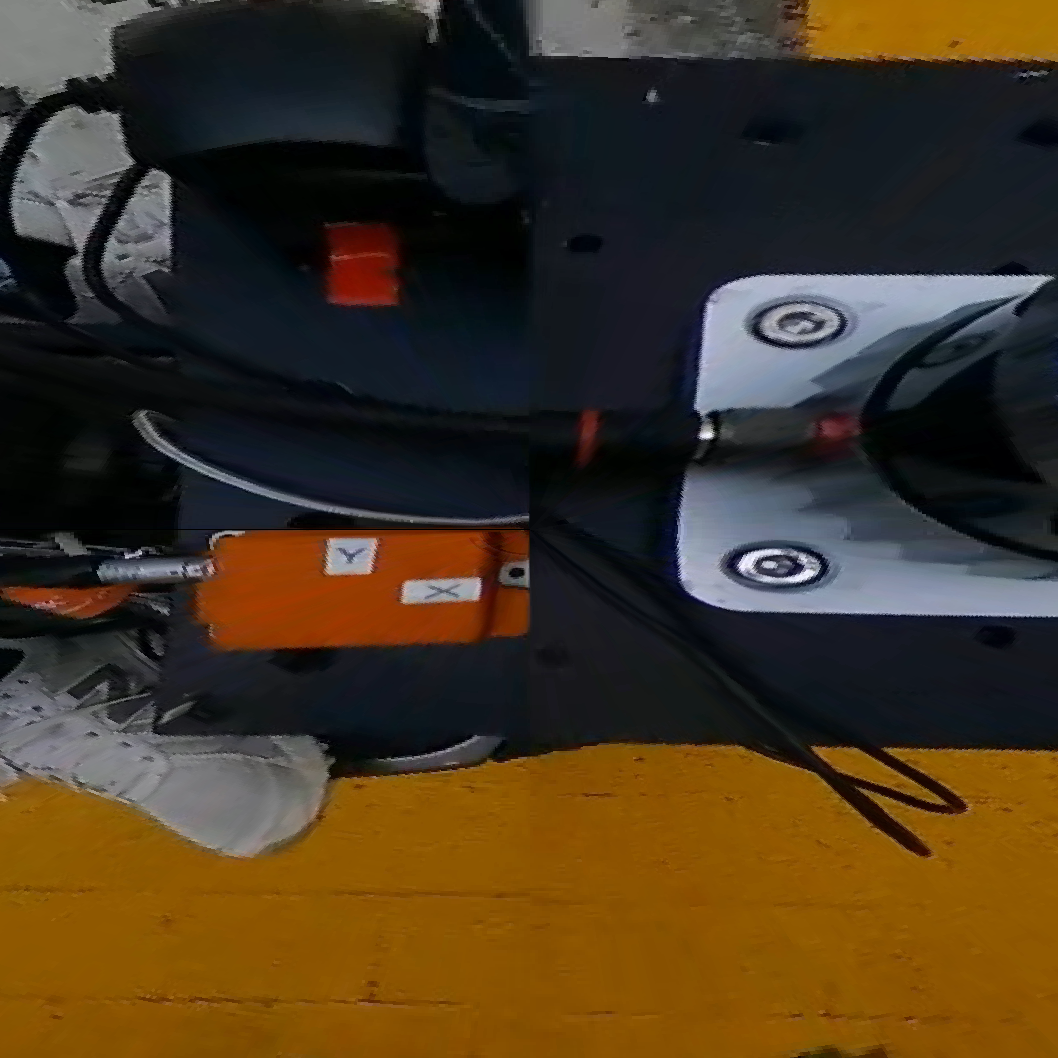

In [57]:
    # 시야각 입력받기
    hfov = float(input("수평 시야각을 입력하세요 (도 단위): "))
    vfov = float(input("수직 시야각을 입력하세요 (도 단위): "))

    topview_img = erp_to_topview(src_img, np.deg2rad(hfov), np.deg2rad(vfov))

    # 상단 뷰 이미지 화면에 표시
    print("Top View:")
    cv2_imshow(topview_img)